# Titanic Dataset: Exploratory Data Analysis
In this notebook, we're going to analyse the famous Titanic dataset from Kaggle. The dataset is meant for supervised machine learning, but we're only going to do some exploratory analysis at this stage.

We'll try to answer the following questions:

- Who were the passengers on the Titanic? (age, gender, class.. etc)
- Where did the passengers come from?
- Who was alone and who was with family?
- What factors helped someone survive the sinking?

In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
titanic_df = pd.read_csv('titanic_train.csv')

In [3]:
titanic_df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


In [5]:
titanic_df.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

In [6]:
#replacing null values of age column by median age
titanic_df['age'] = titanic_df['age'].fillna(titanic_df['age'].median())
titanic_df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,28.0,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [7]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           850 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


In [8]:
titanic_df.describe()

,passenger_id,pclass,age,sibsp,parch,fare,body,survived
count,850.000000,850.00000,850.000000,850.000000,850.000000,849.000000,73.000000,850.000000
mean,662.816471,2.32000,29.208726,0.522353,0.382353,34.012701,165.821918,0.368235
std,380.751936,0.83853,12.999023,1.112132,0.879511,53.705779,99.068487,0.482610
min,1.000000,1.00000,0.166700,0.000000,0.000000,0.000000,4.000000,0.000000
25%,332.250000,2.00000,22.000000,0.000000,0.000000,7.895800,75.000000,0.000000
50%,676.500000,3.00000,28.000000,0.000000,0.000000,14.108300,166.000000,0.000000
75%,992.250000,3.00000,34.875000,1.000000,0.000000,31.000000,260.000000,1.000000
max,1307.000000,3.00000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


 1 in the Survived column means that the person survived, while a 0 mean that they died. So looking at the mean, we can say that only ~37% people survived the sinking.

## Who were the passengers on the Titanic?

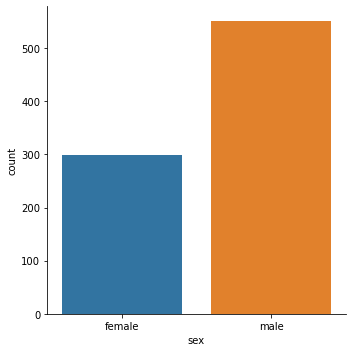

In [9]:
#Creating a factorplot, charting the number of male and female passengers
sns.catplot(x='sex',data=titanic_df,kind='count')

Unsurprisingly, there were considerably more male passengers onboard.

Let's take a look at how the passengers were divided among different classes.

Note: The Pclass attribute is a proxy for the socio-economic class of a person.

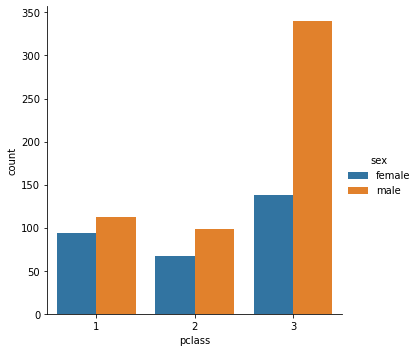

In [10]:
sns.catplot(x='pclass',data=titanic_df,hue='sex',kind='count')

 Dividing the passengers between male, female, and child

In [11]:
#Function to detect if a person is a man, woman or child.
def man_wom_chi(passenger):
    age=passenger['age']
    sex=passenger['sex']
    
    return 'child' if age < 16 else sex

#Using Pandas' apply method to create a new column "Person"
titanic_df['Person'] = titanic_df.apply(man_wom_chi,axis=1)

In [12]:
#Getting the actual counts
print(titanic_df['Person'].value_counts())

male      506
female    264
child      80
Name: Person, dtype: int64


Now, let's create a factorplot to check out the distribution of men, women and children belonging to different classes.

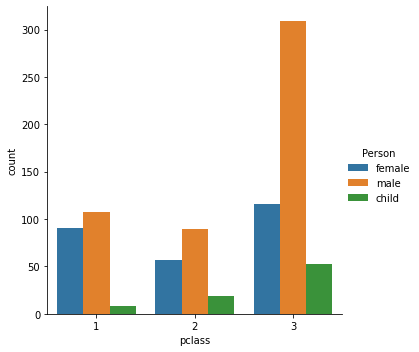

In [13]:
sns.catplot(x='pclass',data=titanic_df,hue='Person',kind='count')

Creating a histogram from the dataset, to check out the distribution of passengers of different age groups

<AxesSubplot:>

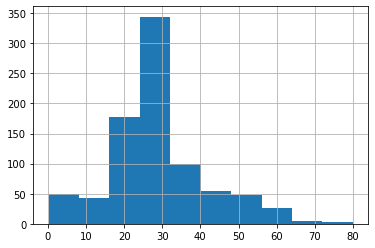

In [14]:
titanic_df['age'].hist()

Let's check out how the age distribution varies for different classes. We'll use Seaborn's Facetgrid for this purpose.

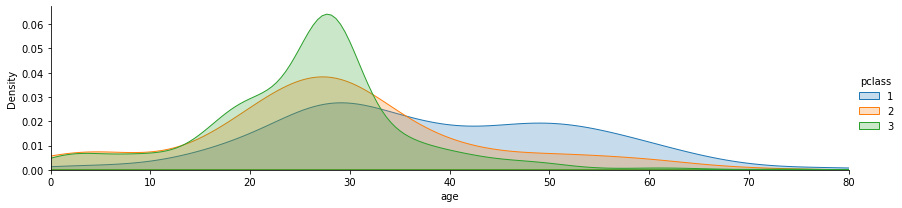

In [15]:
fig = sns.FacetGrid(titanic_df,hue='pclass',aspect=4)

fig.map(sns.kdeplot,'age',shade=True)

oldest = titanic_df['age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

Quite clearly, we can see that the first class passengers belonged more to the middle age groups, with very few children.

Second and third class had more children, with relatively fewer older people.

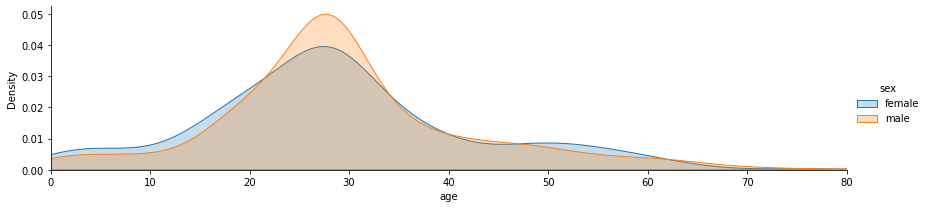

In [16]:
fig = sns.FacetGrid(titanic_df,hue='sex',aspect=4)

fig.map(sns.kdeplot,'age',shade=True)

oldest = titanic_df['age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

## Where did the passengers come from?

The Embarked attribute contains data for the passengers' port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton).

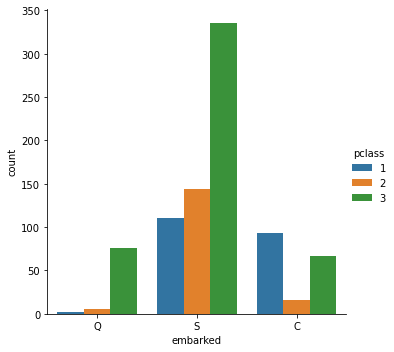

In [25]:
sns.catplot(x='embarked',data=titanic_df,hue='pclass',kind='count')

Most of the passengers embarked from Southampton (including Jack and Rose, in the movie). What's also interesting, is that almost no first or second class passengers embarked from Queenstown, which can tell us something about the socio-economic status of the population of Queenstown.


## Who was with their family?

In [26]:
titanic_df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived,Person
0,1216,3,"Smyth, Miss. Julia",female,28.0,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1,female
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0,male
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0,female
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1,female
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0,male


The **SibsSP** attribute refers to the number of siblings or spouses that a passenger had aboard. **Parch** refers to the number of parents or children someone had on the ship.

As we're just trying to know if a passenger had someone from his family onboard, we can make our life a bit easier by making another column to represent this data.

In [28]:
#Adding the number of family a passenger had onboard
titanic_df['family_mem'] = titanic_df.sibsp + titanic_df.parch

In [29]:
titanic_df['family_mem'].loc[titanic_df['family_mem']>0] = 'Alone'

titanic_df['family_mem'].loc[titanic_df['family_mem']==0] = 'With_Family'

C:\Users\Newton\AppData\Local\Temp/ipykernel_13128/2524260455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['family_mem'].loc[titanic_df['family_mem']>0] = 'Alone'


In [30]:
titanic_df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived,Person,Alone,family_mem
0,1216,3,"Smyth, Miss. Julia",female,28.0,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1,female,0,With_Family
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0,male,0,With_Family
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0,female,2,Alone
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1,female,4,Alone
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0,male,0,With_Family


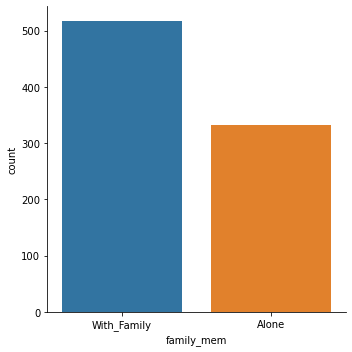

In [31]:
sns.catplot(x='family_mem',data=titanic_df,kind='count')

## What factors helped someone survive the sinking?

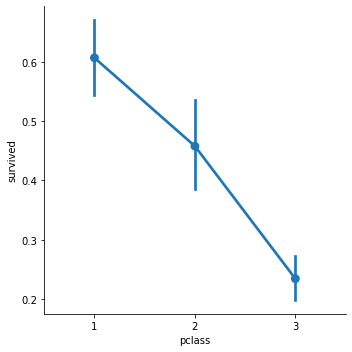

In [32]:
sns.catplot(x='pclass',y='survived',data=titanic_df,kind='point')

To not much surprise, it seems like lower class passengers had a lower chance of survival.

But wait, we saw earlier that there were more men than woman or children, in the 3rd class than in any other class. From the movie 'Titanic', you might remember the 'Women and children first!' protocol that the ship's administration followed while putting passengers on the lifeboats.

Let's see if this is really the case, by using the 'Person' column as the hue in the factorplot.



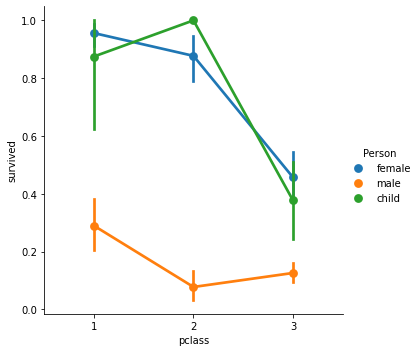

In [34]:
sns.catplot(x='pclass',y='survived',hue='Person',data=titanic_df, kind='point')

And this confirms our suspicion. Men had lower chances of survival than women and children, as they had lower priority of being saved.

We can still generally say that men, women and children belonging to the 3rd class had a lesser chance at survival than their counterparts belonging to the 1st class.

Let's see if there's a relation between the age and survival.

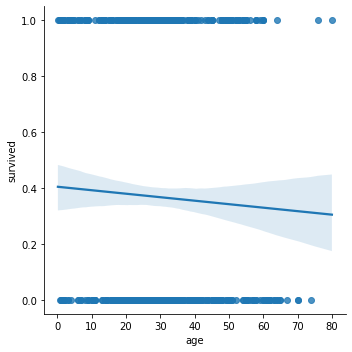

In [35]:
sns.lmplot(x='age',y='survived',data=titanic_df)

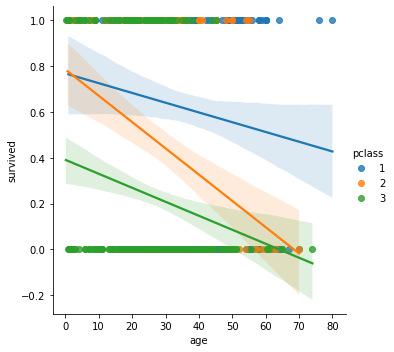

In [36]:
sns.lmplot(x='age',y='survived',hue='pclass',data=titanic_df)

It seems like older people were less likely to survive.

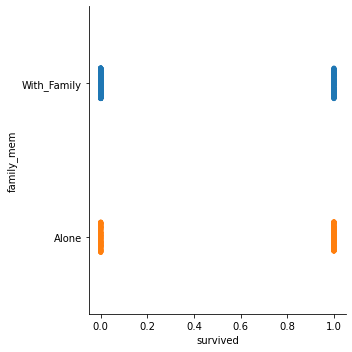

In [38]:
sns.catplot(x='survived',y='family_mem',data=titanic_df)

And if you knew someone on the ship, you had a higher chance of survival, than if you were all alone. Company's always good.